In [1]:
import pathlib as pl
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
imgs = list(pl.Path("./raw_data/tiffs").glob("*.tiff"))
# # random_imgs = random.sample(imgs, min(len(imgs), 10))
random_imgs = imgs
len(random_imgs)

314

In [14]:
# does canny edge detection on an image
def canny_image(image, t1=(0, 0), t2=(0, 0)):

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    mean_power = np.mean(gray) / 255
    print(f"Mean power of the grayscale image: {mean_power}")
    std = np.std(gray) / 255
    print(f"Variance of the grayscale image: {std}")

    t1 = ((mean_power - (2 * std)) * 255, (mean_power - (1 * std)) * 255)
    t2 = ((mean_power + (1 * std)) * 255, (mean_power + (2 * std)) * 255)
    t3 = ((mean_power - (1 * std)) * 255, (mean_power + (1 * std)) * 255)

    # Perform Canny edge detection on the grayscale image with two different thresholds
    edges1 = cv2.Canny(gray, threshold1=t1[0], threshold2=t1[1])
    edges2 = cv2.Canny(
        cv2.GaussianBlur(gray, (11, 11), std * 4, std / 2),
        threshold1=t2[0],
        threshold2=t2[1],
    )
    edges3 = cv2.Canny(gray, threshold1=t3[0], threshold2=t3[1])

    # Make the lines in edges3 wider
    kernel = np.ones((10, 10), np.uint8)
    edges3 = cv2.dilate(edges3, kernel, iterations=1)

    # Create a blank image with the same dimensions as the original image
    combined_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    # Set the first color channel as the original image

    combined_image[:, :, 0] = gray

    # Set the second color channel as edges1
    combined_image[:, :, 1] = edges1 * 0.45 + edges3 * 0.3

    # Set the third color channel as edges2
    # combined_image[:, :, 2] = edges2_thicker
    combined_image[:, :, 2] = edges2 * 0.9 + edges3 * 0.3
    # Calculate the mean power of the grayscale image
    return combined_image, mean_power, std

0.0031847133757961785
Mean power of the grayscale image: 0.3653288298962163
Variance of the grayscale image: 0.10198825480527882
0.2791683723243302


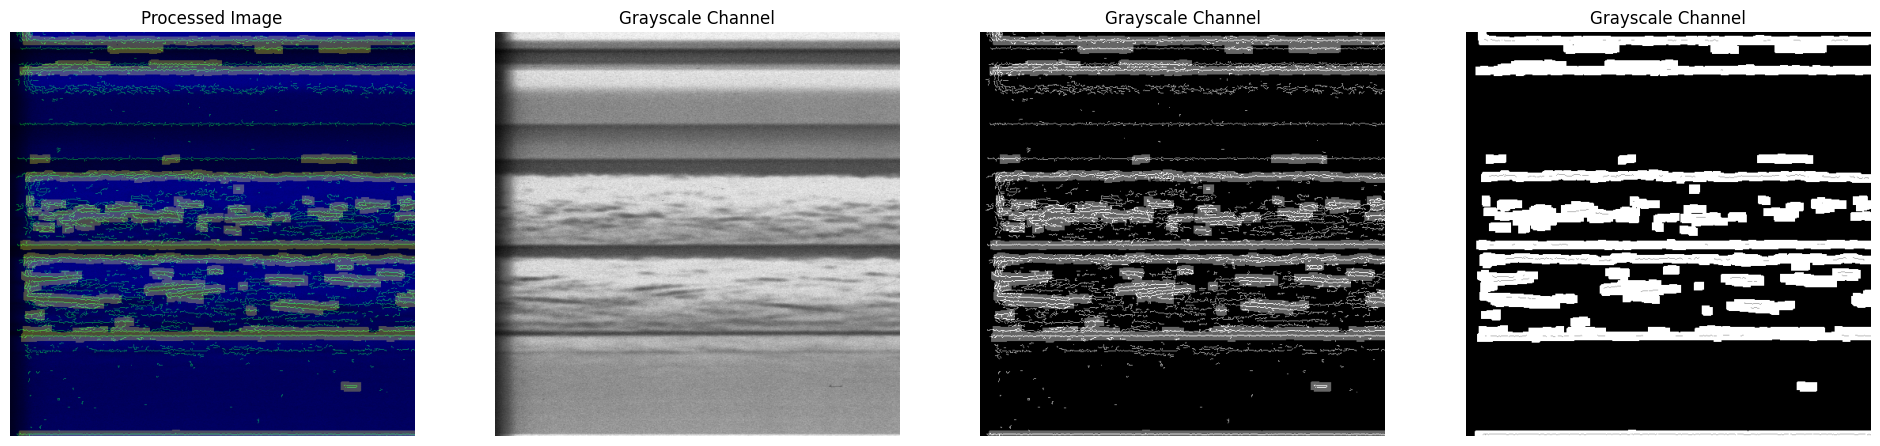

In [15]:
# Apply canny edge detection to each image in random_imgs
processed_images = []

for count, img_path in enumerate(random_imgs):
    # Read the image using cv2
    print((count + 1)/len(random_imgs))
    cv2_img = cv2.imread(str(img_path))
    # Crop the image (example: crop 10 pixels from each side)
    cv2_img = cv2_img[430:1790, 0:512, :]
    cv2_img = cv2.resize(cv2_img, (512, 512))

    processed_img, power, var = canny_image(cv2_img)
    print(var / power)
    # Append the processed image to the list
    processed_images.append(processed_img)

    fig, axes = plt.subplots(1, 4, figsize=(24, 6))

    # Plot the original processed image
    axes[0].imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    axes[0].axis("off")
    axes[0].set_title("Processed Image")

    # Plot the grayscale channel of the processed image
    axes[1].imshow(processed_img[:, :, 0], cmap="gray")
    axes[1].axis("off")
    axes[1].set_title("Grayscale Channel")

    axes[2].imshow(processed_img[:, :, 1], cmap="gray")
    axes[2].axis("off")
    axes[2].set_title("Grayscale Channel")

    axes[3].imshow(processed_img[:, :, 2], cmap="gray")
    axes[3].axis("off")
    axes[3].set_title("Grayscale Channel")

    plt.show()
    break